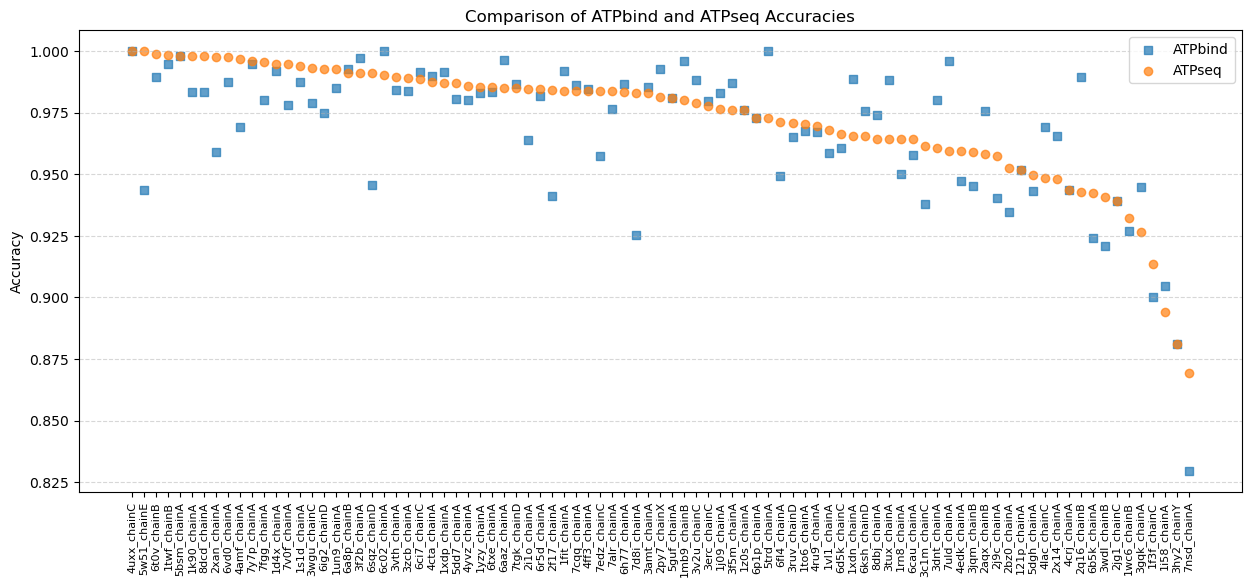

In [7]:

import pandas as pd

# File path
file_path = "ATPbind&PDB.csv"

# Load the dataset
df = pd.read_csv(file_path)



import matplotlib.pyplot as plt
import seaborn as sns

# Reshape data for plotting
df_plot = df.pivot(index="Prot.ID", columns="Method", values="Acc")

# Sort by ATPseq accuracy for better visualization
df_plot = df_plot.sort_values(by="ATPseq", ascending=False)

# Plot
plt.figure(figsize=(15, 6))
markers = {"ATPseq": "o", "ATPbind": "s"}

for method in df_plot.columns:
    plt.scatter(df_plot.index, df_plot[method], label=method, marker=markers[method], alpha=0.7)

# Formatting
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Accuracy")
plt.title("Comparison of ATPbind and ATPseq Accuracies")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [17]:
# Compute RMSD using the heuristic formula: RMSD = 10 * (1 - Accuracy)^1.5
df["RMSD"] = 10 * (1 - df["Acc"]) ** 1.5
# Compute TM-score using an approximate empirical formula:
# TM-score ≈ 1 / (1 + (RMSD / d0))
# where d0 is a scaling factor that depends on protein length (typically ~4Å for medium-sized proteins).
d0 = 4  # Assumed value for now
df["TM-score"] = 1 / (1 + (df["RMSD"] / d0))

# Display the results
print(df[["Prot.ID", "Method", "Acc", "RMSD", "TM-score"]].head(10))

       Prot.ID   Method       Acc      RMSD  TM-score
0  121p_chainA   ATPseq  0.951807  0.105797  0.974232
1  121p_chainA  ATPbind  0.951807  0.105797  0.974232
2  1d4x_chainA   ATPseq  0.994565  0.004007  0.998999
3  1d4x_chainA  ATPbind  0.991848  0.007361  0.998163
4  1f3f_chainC   ATPseq  0.913333  0.255140  0.940040
5  1f3f_chainC  ATPbind  0.900000  0.316228  0.926735
6  1fit_chainA   ATPseq  0.983871  0.020484  0.994905
7  1fit_chainA  ATPbind  0.991935  0.007242  0.998193
8  1i58_chainA   ATPseq  0.894180  0.344233  0.920761
9  1i58_chainA  ATPbind  0.904762  0.293911  0.931552


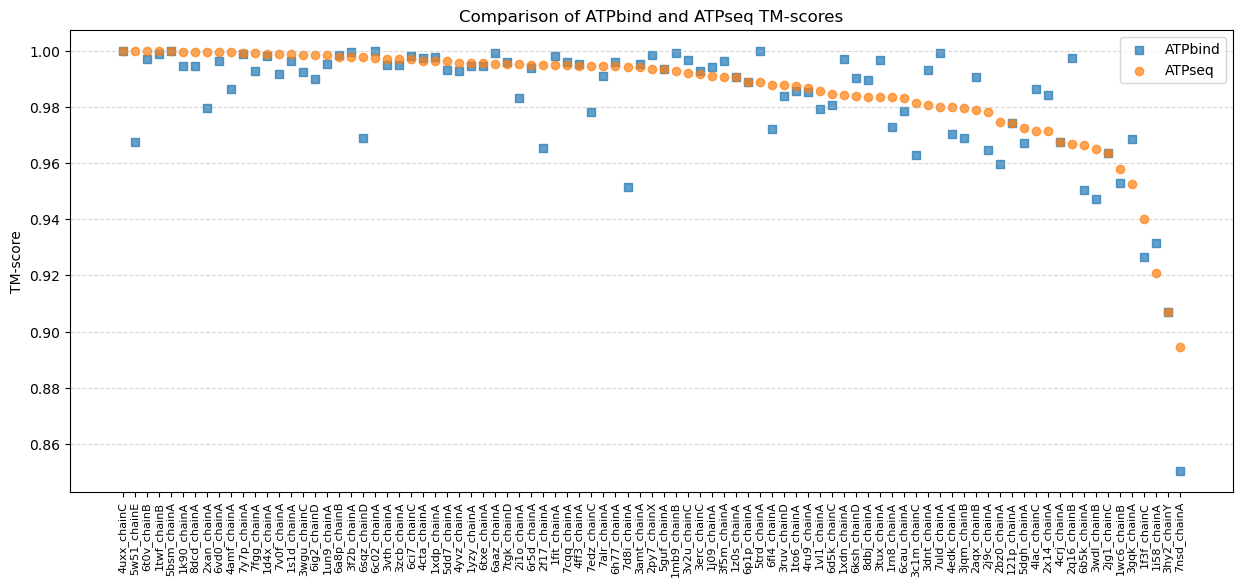

In [19]:
# Reshape data for plotting using TM-score
df_plot_tm = df.pivot(index="Prot.ID", columns="Method", values="TM-score")

# Sort by ATPseq TM-score for better visualization
df_plot_tm = df_plot_tm.sort_values(by="ATPseq", ascending=False)

# Plot
plt.figure(figsize=(15, 6))
markers = {"ATPseq": "o", "ATPbind": "s"}

for method in df_plot_tm.columns:
    plt.scatter(df_plot_tm.index, df_plot_tm[method], label=method, marker=markers[method], alpha=0.7)

# Formatting
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("TM-score")
plt.title("Comparison of ATPbind and ATPseq TM-scores")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()
